Dataset Preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Mean of numeric columns:
 Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

Median of numeric columns:
 Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

Mode of numeric columns:
 Id               1.0
SepalLengthCm    5.0
SepalWidthCm     3.0
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 0, dtype: float64


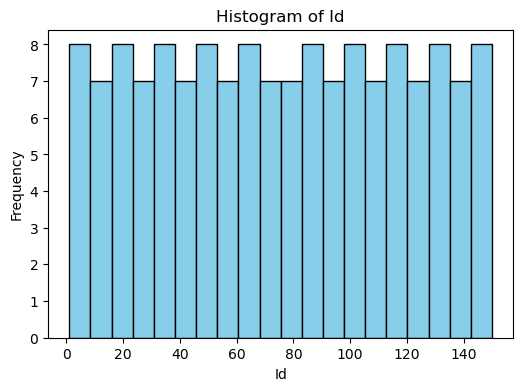

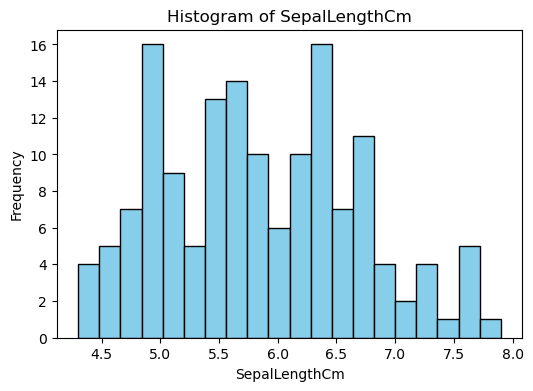

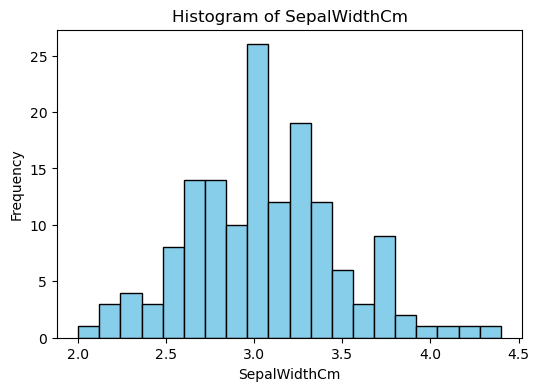

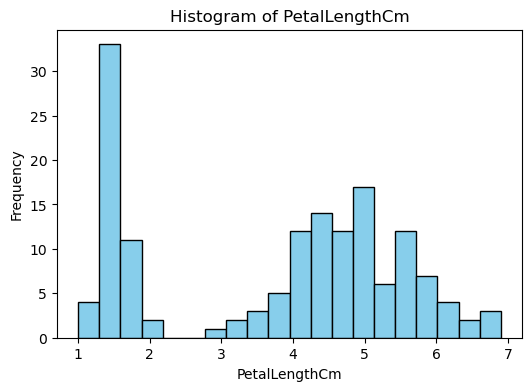

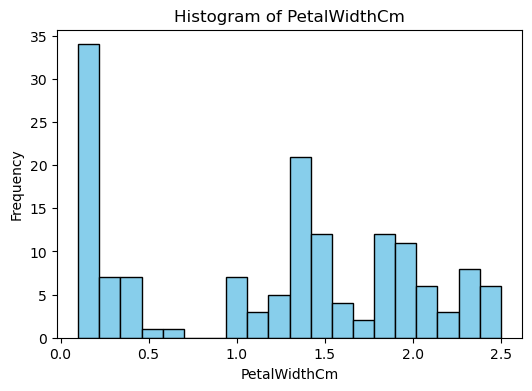

In [13]:
# DATA ANALYSIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading the dataset
df = pd.read_csv('Iris.csv')

# preview data
print("Dataset Preview:")
print(df.head())

numeric_df = df.select_dtypes(include=[np.number])

# basic statistics
mean = numeric_df.mean()
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]  # mode() can return multiple modes, select the first row

print("\nMean of numeric columns:\n", mean)
print("\nMedian of numeric columns:\n", median)
print("\nMode of numeric columns:\n", mode)

# plot histograms for each numeric column
for column in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(numeric_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [15]:
#NEWS SCRAPPER

import tkinter as tk
from tkinter import messagebox, filedialog
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_data():
    url = entry_url.get()
    html_tag = entry_tag.get()
    html_class = entry_class.get()
    
    if not url or not html_tag:
        messagebox.showerror("Input Error", "Please provide both URL and HTML Tag.")
        return

    try:
        # fetch webpage content
        response = requests.get(url)
        if response.status_code != 200:
            messagebox.showerror("Error", f"Failed to fetch the webpage. Status code: {response.status_code}")
            return

        # parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # find elements based on tag and class
        if html_class:
            elements = soup.find_all(html_tag, class_=html_class)
        else:
            elements = soup.find_all(html_tag)

        # extract text from elements
        data = [element.get_text(strip=True) for element in elements]

        # update results in the GUI
        text_results.delete("1.0", tk.END)
        text_results.insert(tk.END, "\n".join(data))

        # save data for later use
        global scraped_data
        scraped_data = data

        messagebox.showinfo("Success", f"Scraped {len(data)} items from the webpage.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# function to save scraped data to CSV
def save_to_csv():
    if not scraped_data:
        messagebox.showwarning("No Data", "No data to save. Please scrape data first.")
        return

    # prompt user to choose a file location
    file_path = filedialog.asksaveasfilename(
        defaultextension=".csv",
        filetypes=[("CSV Files", "*.csv"), ("All Files", "*.*")]
    )

    if file_path:
        try:
            # Save data to CSV
            df = pd.DataFrame(scraped_data, columns=["Scraped Data"])
            df.to_csv(file_path, index=False)
            messagebox.showinfo("Success", f"Data saved to {file_path}")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to save data: {e}")

root = tk.Tk()
root.title("Web Scraper")

scraped_data = []

# input fields
tk.Label(root, text="URL:").grid(row=0, column=0, padx=10, pady=5, sticky="e")
entry_url = tk.Entry(root, width=50)
entry_url.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="HTML Tag:").grid(row=1, column=0, padx=10, pady=5, sticky="e")
entry_tag = tk.Entry(root, width=20)
entry_tag.grid(row=1, column=1, padx=10, pady=5, sticky="w")

tk.Label(root, text="Class Name (Optional):").grid(row=2, column=0, padx=10, pady=5, sticky="e")
entry_class = tk.Entry(root, width=20)
entry_class.grid(row=2, column=1, padx=10, pady=5, sticky="w")

# buttons
btn_scrape = tk.Button(root, text="Scrape", command=scrape_data)
btn_scrape.grid(row=3, column=0, columnspan=2, pady=10)

btn_save = tk.Button(root, text="Save to CSV", command=save_to_csv)
btn_save.grid(row=4, column=0, columnspan=2, pady=10)

# results display
tk.Label(root, text="Scraped Data:").grid(row=5, column=0, padx=10, pady=5, sticky="nw")
text_results = tk.Text(root, wrap="word", height=15, width=60)
text_results.grid(row=5, column=1, padx=10, pady=5)

root.mainloop()


In [19]:
#EXPENSE TRACKER

import pandas as pd
import tkinter as tk
from tkinter import messagebox
from datetime import datetime

# File where expenses will be saved
FILE_PATH = "expenses.csv"

# Initialize or load the DataFrame
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    # Create an empty DataFrame if file does not exist
    df = pd.DataFrame(columns=['Date', 'Category', 'Amount'])

# Function to add expense
def add_expense():
    day = entry_day.get()
    month = entry_month.get()
    year = entry_year.get()
    category = entry_category.get()

    # Validate amount input
    try:
        amount = float(entry_amount.get())
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter a valid amount.")
        return

    # Combine date fields into YYYY-MM-DD format
    try:
        date = f"{year}-{month.zfill(2)}-{day.zfill(2)}"
        datetime.strptime(date, "%Y-%m-%d")  # Validate date format
    except ValueError:
        messagebox.showerror("Invalid Date", "Please enter a valid date.")
        return

    # Append data to the DataFrame using pandas.concat
    global df
    new_row = pd.DataFrame({'Date': [date], 'Category': [category], 'Amount': [amount]})
    df = pd.concat([df, new_row], ignore_index=True)

    # Save the updated DataFrame to CSV
    df.to_csv(FILE_PATH, index=False)

    # Clear the input fields
    entry_day.delete(0, tk.END)
    entry_month.delete(0, tk.END)
    entry_year.delete(0, tk.END)
    entry_category.delete(0, tk.END)
    entry_amount.delete(0, tk.END)

    # Update summary display
    update_summary()
    messagebox.showinfo("Expense Added", "Your expense has been added successfully!")

# Function to update summary display
def update_summary():
    if not df.empty:
        total_expense = df['Amount'].sum()
        category_summary = df.groupby('Category')['Amount'].sum()

        summary_text = f"Total Expenses: \u20B9{total_expense:.2f}\n\n"
        summary_text += "Expenses by Category:\n"
        for category, amount in category_summary.items():
            summary_text += f"{category}: \u20B9{amount:.2f}\n"
    else:
        summary_text = "No expenses to show."

    label_summary.config(text=summary_text)

# Initialize Tkinter window
root = tk.Tk()
root.title("Expense Tracker")

# Create input fields and labels
tk.Label(root, text="Date (DD MM YYYY):").grid(row=0, column=0, padx=10, pady=5, sticky="e")
entry_day = tk.Entry(root, width=4)
entry_day.grid(row=0, column=1, padx=2, pady=5, sticky="w")
entry_month = tk.Entry(root, width=4)
entry_month.grid(row=0, column=1, padx=40, pady=5, sticky="w")
entry_year = tk.Entry(root, width=6)
entry_year.grid(row=0, column=1, padx=80, pady=5, sticky="w")

tk.Label(root, text="Category:").grid(row=1, column=0, padx=10, pady=5, sticky="e")
entry_category = tk.Entry(root, width=20)
entry_category.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Amount:").grid(row=2, column=0, padx=10, pady=5, sticky="e")
entry_amount = tk.Entry(root, width=20)
entry_amount.grid(row=2, column=1, padx=10, pady=5)

# Add button to submit expense
btn_add = tk.Button(root, text="Add Expense", command=add_expense)
btn_add.grid(row=3, column=0, columnspan=2, pady=10)

# Label for displaying summary
label_summary = tk.Label(root, text="", justify="left", font=("Arial", 10))
label_summary.grid(row=4, column=0, columnspan=2, padx=10, pady=10)

# Initialize summary display
update_summary()

# Run the Tkinter event loop
root.mainloop()


In [17]:
#CALCULATOR

import tkinter as tk

def evaluate_expression():
    try:
        expression = entry.get()
        result = str(eval(expression))
        entry.delete(0, tk.END)
        entry.insert(tk.END, result)
    except Exception as e:
        # In case of error
        entry.delete(0, tk.END)
        entry.insert(tk.END, "Error")

def append_to_expression(char):
    entry.insert(tk.END, char)

def clear_expression():
    entry.delete(0, tk.END)

root = tk.Tk()
root.title("Calculator")

entry = tk.Entry(root, width=16, font=('Arial', 24), borderwidth=2, relief="solid", justify="right")
entry.grid(row=0, column=0, columnspan=4)

buttons = [
    ('7', 1, 0), ('8', 1, 1), ('9', 1, 2), ('/', 1, 3),
    ('4', 2, 0), ('5', 2, 1), ('6', 2, 2), ('*', 2, 3),
    ('1', 3, 0), ('2', 3, 1), ('3', 3, 2), ('-', 3, 3),
    ('0', 4, 0), ('.', 4, 1), ('+', 4, 2), ('=', 4, 3),
    ('C', 5, 0)  # Clear button
]

for (text, row, col) in buttons:
    if text == '=':
        btn = tk.Button(root, text=text, width=5, height=2, font=('Arial', 18),
                        command=evaluate_expression)
    elif text == 'C':
        btn = tk.Button(root, text=text, width=5, height=2, font=('Arial', 18),
                        command=clear_expression)
    else:
        btn = tk.Button(root, text=text, width=5, height=2, font=('Arial', 18),
                        command=lambda t=text: append_to_expression(t))
    
    btn.grid(row=row, column=col, sticky="nsew")

for i in range(6):
    root.grid_rowconfigure(i, weight=1)
    root.grid_columnconfigure(i % 4, weight=1)

# Run the Tkinter event loop
root.mainloop()
